 Training samples: 74682
 Validation samples: 1000

Sentiment Labels: ['Irrelevant', 'Negative', 'Neutral', 'Positive']


C:\Users\compu market\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 58s 48ms/step - accuracy: 0.3015 - loss: 1.3654 - val_accuracy: 0.2920 - val_loss: 1.3606
Epoch 2/5
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 70s 60ms/step - accuracy: 0.3849 - loss: 1.2742 - val_accuracy: 0.5210 - val_loss: 0.9724
Epoch 3/5
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 59s 51ms/step - accuracy: 0.5571 - loss: 0.9760 - val_accuracy: 0.7930 - val_loss: 0.6129
Epoch 4/5
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 58s 50ms/step - accuracy: 0.7351 - loss: 0.6810 - val_accuracy: 0.8710 - val_loss: 0.3933
Epoch 5/5
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 57s 48ms/step - accuracy: 0.8202 - loss: 0.4843 - val_accuracy: 0.9120 - val_loss: 0.2888
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9136 - loss: 0.2851

 Validation Accuracy: 91.20%
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


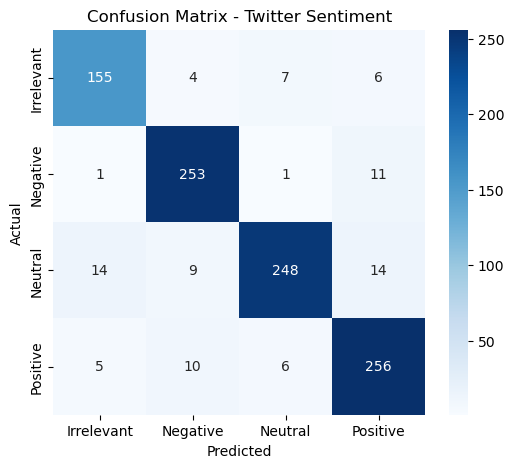


Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.89      0.90      0.89       172
    Negative       0.92      0.95      0.93       266
     Neutral       0.95      0.87      0.91       285
    Positive       0.89      0.92      0.91       277

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



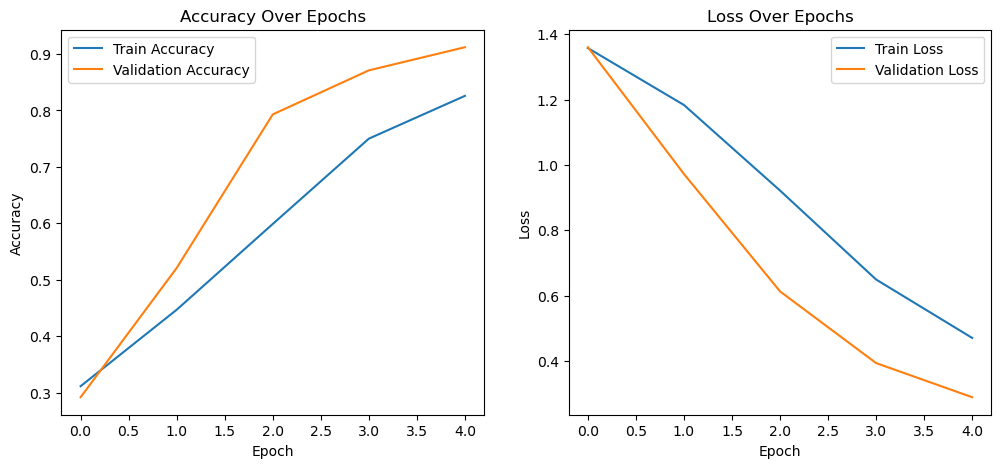

 Model saved successfully as 'twitter_sentiment_lstm.keras'


In [1]:
# -------------------------------
# Task: Twitter Sentiment Analysis (LSTM/RNN)
# -------------------------------

import pandas as pd
import numpy as np
import re
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


train_path = "twitter_training.csv"
val_path = "twitter_validation.csv"

train_df = pd.read_csv(train_path, header=None)
val_df = pd.read_csv(val_path, header=None)

# Adjust columns if dataset has no headers
train_df.columns = ["id", "entity", "sentiment", "tweet"]
val_df.columns = ["id", "entity", "sentiment", "tweet"]

print(" Training samples:", len(train_df))
print(" Validation samples:", len(val_df))


def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

train_df['clean_tweet'] = train_df['tweet'].apply(clean_text)
val_df['clean_tweet'] = val_df['tweet'].apply(clean_text)

encoder = LabelEncoder()
train_df['label'] = encoder.fit_transform(train_df['sentiment'])
val_df['label'] = encoder.transform(val_df['sentiment'])

print("\nSentiment Labels:", list(encoder.classes_))


max_words = 10000
max_len = 50

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['clean_tweet'])

X_train = tokenizer.texts_to_sequences(train_df['clean_tweet'])
X_val = tokenizer.texts_to_sequences(val_df['clean_tweet'])

X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_val = pad_sequences(X_val, maxlen=max_len, padding='post', truncating='post')

y_train = train_df['label'].values
y_val = val_df['label'].values

model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(encoder.classes_), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_val, y_val)
)


loss, acc = model.evaluate(X_val, y_val)
print(f"\n Validation Accuracy: {acc * 100:.2f}%")


y_pred = np.argmax(model.predict(X_val), axis=1)

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Twitter Sentiment")
plt.show()

print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=encoder.classes_))


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


model.save("twitter_sentiment_lstm.keras")
print(" Model saved successfully as 'twitter_sentiment_lstm.keras'")
